In [9]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

%matplotlib notebook

In [10]:
# target y
actual = np.random.randint(0, 10, 20)

# input features 
X = actual ** 1.5 - np.random.randn(len(actual))

In [11]:
initial_guess = np.random.random(2) / 100

# initial guess for thetas
theta0, theta1 = initial_guess

theta0, theta1

(0.0068423302651215686, 0.004401524937396013)

In [12]:
pred = theta0 + theta1 * X 
pred

array([0.07357102, 0.03176325, 0.08729471, 0.05047588, 0.07912354,
       0.12815843, 0.02374972, 0.0701481 , 0.0923564 , 0.04827082,
       0.02326224, 0.08935347, 0.08806249, 0.02556279, 0.05844899,
       0.0415663 , 0.01630998, 0.08670607, 0.0586966 , 0.01252775])

In [13]:
def objective_function(pred, actual) -> float:
    """
    Cost function
    """
    # 1 / n instead of 1 / 2n because only 2 params
    return 1 / 2 * np.sum((pred - actual)**2)

In [14]:
J = objective_function(pred,actual)
J

273.0081287327739

In [15]:
def compute_gradients(pred, X, actual):
    """
    Compute the gradients of the cost function w.r.t thetas
    """
    n = len(actual)
    error = pred - actual
    gradient_theta0 = np.sum(error) / n 
    gradient_theta1 = np.sum(error * X) / n 
    return gradient_theta0, gradient_theta1

grad_theta0, grad_theta1 = compute_gradients(pred, X, actual)
grad_theta0, grad_theta1 = np.round(grad_theta0, 3), np.round(grad_theta1, 3)

grad_theta0, grad_theta1

(-4.741, -71.55)

<IPython.core.display.Javascript object>


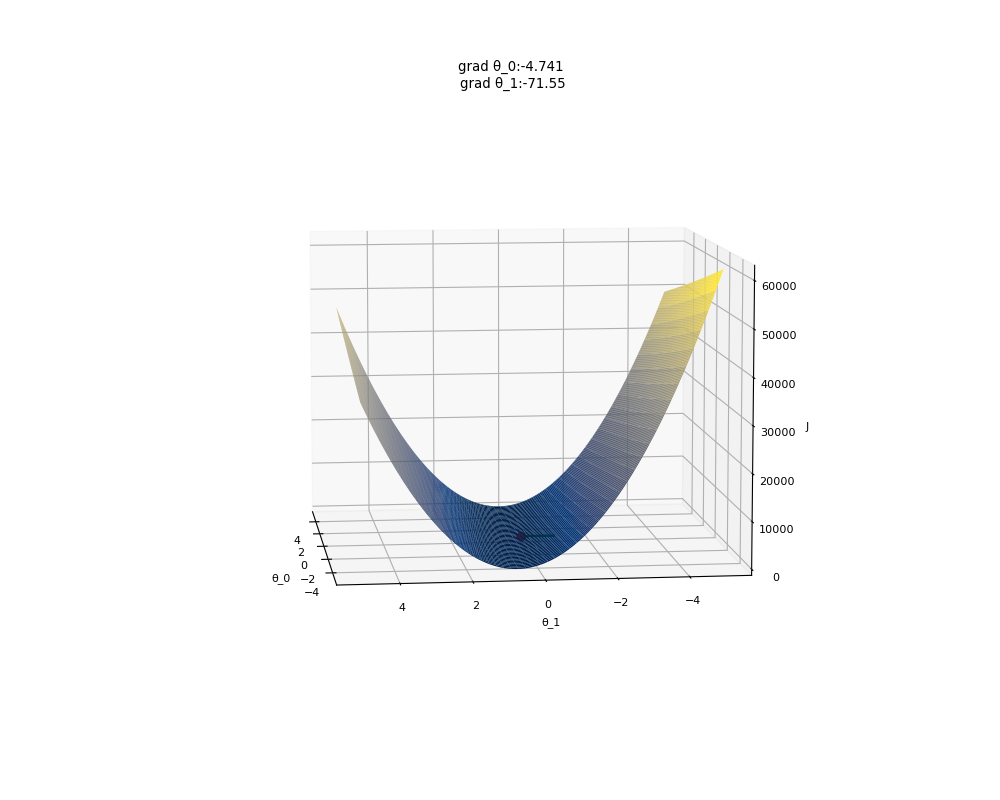

In [18]:
theta0_range = np.linspace(-5, 5, 100)
theta1_range = np.linspace(-5, 5, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_range, theta1_range)
J_grid = np.zeros_like(theta0_grid)

# J for each theta
for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        pred = theta0_grid[i, j] + theta1_grid[i, j] * X
        J_grid[i, j] = objective_function(pred, actual)


fig = plt.figure(figsize=(10, 8))

# font size smaller
plt.rcParams['font.size'] = '8'

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_grid, theta1_grid, J_grid, cmap='cividis')

# initial point
ax.plot(theta0, theta1, 'ro')

# adding vector
ax.quiver(theta0, theta1, 0, grad_theta0, grad_theta1 , 0, normalize=True, color='green')

ax.set_title(f'grad θ_0:{grad_theta0} \ngrad θ_1:{grad_theta1}')
ax.set_xlabel('θ_0')
ax.set_ylabel('θ_1')
ax.set_zlabel('J')
plt.show()